## Увеличение выручки интернет-магазина 📃
 
* Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.


------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------
## Данные 💾

#### Данные для первой части
##### Файл c гипотезами (/datasets/hypothesis.csv) 
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

#### Данные для второй части
##### Файл c заказами (/datasets/orders.csv) 
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

##### Файл с посещениями (/datasets/visitors.csv)
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------

## Цель  проекта 🎯
* Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.
* Принятие решения по результатам А/В теста и выводы по нему. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.



## Оглавление:<a id="step100"></a>

### [Подготовка данных](#step0)
* [Общая](#step0)
* [Для анализа теста](#step0.1)

### [Часть 1. Приоритизация гипотез.](#step1)
* [Примение фреймворка `ICE` для приоритизации гипотез. Сортировка по убыванию приоритета.](#step1.1)
* [Примение фреймворка `RICE` для приоритизации гипотез. Сортировка по убыванию приоритета.](#step1.2)
* [Изменение приоритизации гипотез при применении `RICE` вместо `ICE`. Причины изменений.](#step1.3)

### [Часть 2. Анализ A/B-теста](#step2)
#### Анализ кумулятивных метрик

* [График кумулятивной выручки по группам.](#step2.1)
* [График кумулятивного среднего чека по группам.](#step2.2)
* [График относительного изменения кумулятивного среднего чека группы B к группе A.](#step2.3)
* [График кумулятивной конверсии по группам](#step2.4)
* [График относительного изменения кумулятивной конверсии группы B к группе A.](#step2.5)

#### Анализ аномальных значений (выбросы и всплески)

* [Точечный график количества заказов по пользователям.](#step2.6)
* [Подсчёт 95-го и 99-го перцентилей количества заказов на пользователя. Выбор границы для определения аномальных пользователей. ](#step2.7)
* [Точечный график стоимостей заказов.](#step2.8)
* [Подсчёт 95-го и 99-го перцентилей стоимости заказов.](#step2.9)

#### Расчёт статистической значимости
* [Формулировка гипотез](#step2.10)
* [Подготовка данных ](#step2.11)
* [Выбор критерия](#step2.12)
* [Расчёт статистической значимости различий в конверсии между группами по «сырым» данным. ](#step2.13)
* [Расчёт статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.](#step2.14)
* [Расчёт статистической значимости различий в конверсии между группами по «очищенным» данным. ](#step2.15)
* [Расчёт статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным](#step2.16)

### [Общие выводы по проекту](#step3)

### [Рекомендации по результатам проведённого А/B теста](#step4)

## Подготовка данных <a id="step0"></a>

In [61]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
from pandas.plotting import register_matplotlib_converters
from matplotlib.pyplot import figure
import statsmodels.api as sm
register_matplotlib_converters()

In [62]:
pd.set_option('max_colwidth', -1)

In [63]:
hypothesis=pd.read_csv('/datasets/hypothesis.csv')

In [64]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [65]:
#Поменяем названия столбцов на прописные для удобства
hypothesis.columns=['hypothesis', 'reach', 'impact', 'confidence', 'efforts']

In [66]:
orders=pd.read_csv('/datasets/orders.csv', sep=',')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [67]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [68]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [69]:
orders.duplicated().sum()

0

In [70]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [71]:
visitors=pd.read_csv('/datasets/visitors.csv', sep=',')
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [72]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [73]:
visitors.duplicated().sum()

0

In [74]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


* Пропусков, дубликатов в представленных датафреймах не обнаружено;
* Названия столбцов в датафрейме с гипотезами приведены к нижнему регистру;
* В наборах данных `orders` и `visitors` столбцы date приведены к нужному типу данных.

# Часть 1. Приоритизация гипотез. <a id="step1"></a>

### Примение фреймворка `ICE` для приоритизации гипотез. Сортировка по убыванию приоритета.<a id="step1.1"></a>

* Применим фреймворк ICE

In [75]:
hypothesis['ICE']=(hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']
#Отсортируем по убыванию    
hypothesis[['hypothesis','ICE']].sort_values(by='ICE',ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


### Примение фреймворка `RICE` для приоритизации гипотез. Сортировка по убыванию приоритета.<a id="step1.2"></a>

* Применим фреймворка RICE

In [76]:
hypothesis['RICE']=(hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']
#Отсортируем по убыванию
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


### Изменение приоритизации гипотез при применении `RICE` вместо `ICE`. Причины изменений. <a id="step1.3"></a>



* Выведем сводную таблицу с ICE и RICE и параметр REACH для оценки охвата

In [77]:
hypothesis.sort_values(by='RICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


* После применения фреймворка RICE приоритет гипотез поменялся, поскольку добавилась такая переменная, как охват, то есть большее количество пользователей охватывает именно гипотеза №10. 
* Это произошло, потому что в этой гипотезе самый большой параметр охвата (REACH), соответственно это изменение коснётся максимального количества пользователей.
* При этом это затронет не менее 70% пользователей
* И высокий уровень уверенности, что изменение повлияет на пользователей и оценки других параметров верны.
* Сложность проверки гипотезы при этом средней сложности

##### [Назад к оглавлению](#step100)

# Часть 2. Анализ A/B-теста<a id="step2"></a>

### График кумулятивной выручки по группам. Выводы и предположения.<a id="step2.1"></a>

In [78]:
#Сделаем группы по данным о датах, выручке и числе заказов в группах A и B.
datesGroups = orders[['date','group']].drop_duplicates()
 
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
 
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
 
cumulativeData.head(10)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
5,2019-08-03,B,61,59,380996,1803
6,2019-08-04,A,84,77,425699,2562
7,2019-08-04,B,78,75,489567,2573
8,2019-08-05,A,109,100,549917,3318
9,2019-08-05,B,101,98,581995,3280


In [79]:
#Сделаем переменные с данными с разделением на группы A и B.
cumulativeRevenueA=cumulativeData[cumulativeData['group']=='A'][['date', 'revenue', 'orders']]
cumulativeRevenueB=cumulativeData[cumulativeData['group']=='B'][['date', 'revenue', 'orders']]

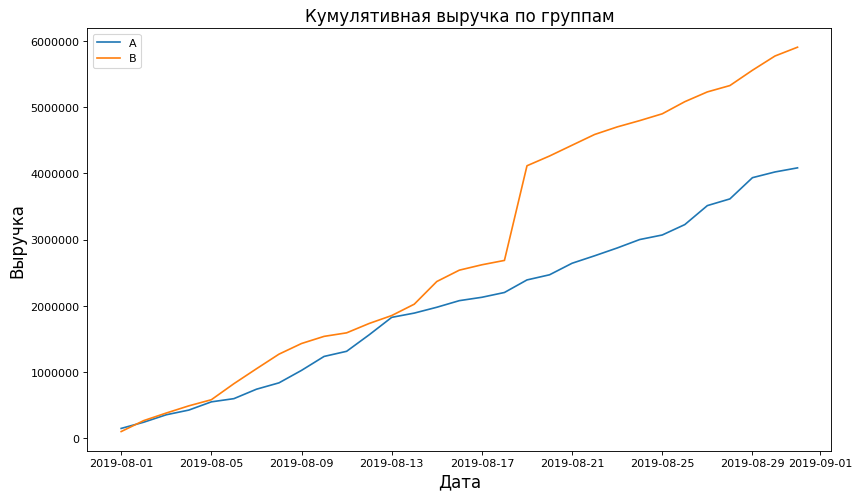

In [80]:
plt.figure(num=None, figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Кумулятивная выручка по группам', size='15')
plt.xlabel('Дата', size='15')
plt.ylabel('Выручка', size='15')
plt.legend()
plt.show()
register_matplotlib_converters();

* Начиная с 2019-08-13 группа B вырвалась вперёд, это может быть связано c аномально большими заказами

### График кумулятивного среднего чека по группам. Выводы и предположения.<a id="step2.2"></a>


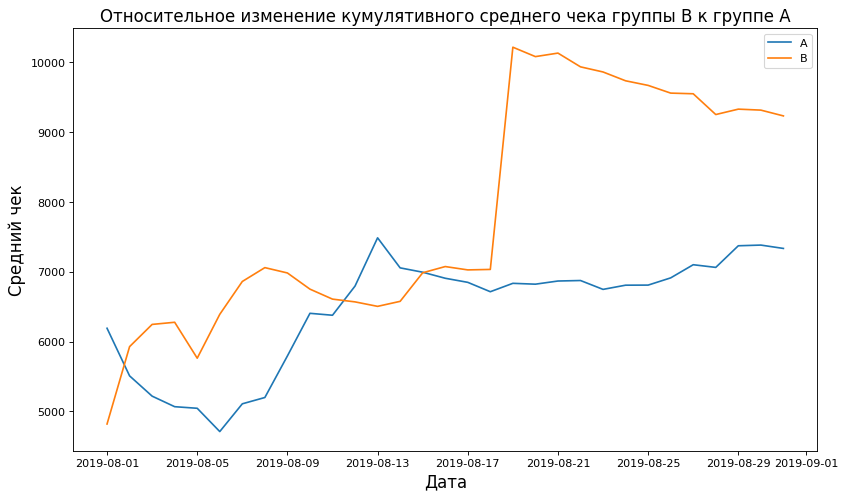

In [81]:
plt.figure(num=None, figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A', size='15')
plt.xlabel('Дата', size='15')
plt.ylabel('Средний чек', size='15')
plt.legend()
plt.show()

* По среднему чек вперёд на середине теста вырвалась также группа B, только немного позже, с 2019-08-17.

### График относительного изменения кумулятивного среднего чека группы B к группе A . Выводы и предположения.<a id="step2.3"></a>


In [82]:
#Объединим таблицы cumulativeRevenueA и cumulativeRevenueB
mergedCumulativeRevenue = cumulativeRevenueA.merge\
(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

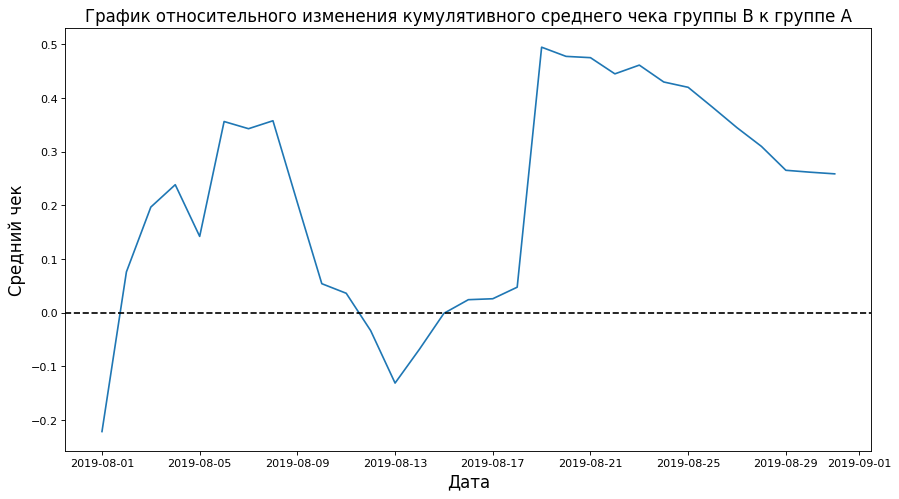

In [83]:
plt.figure(num=None, figsize=(13, 7), dpi=80, facecolor='w', edgecolor='k')
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], \
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])\
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', size='15')
plt.xlabel('Дата', size='15')
plt.ylabel('Средний чек', size='15')
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

* Из графика видно, что опять наблюдаются сильные колебания, видимо причина в аномалиях

### График кумулятивной конверсии по группам. Выводы и предположения.<a id="step2.4"></a>

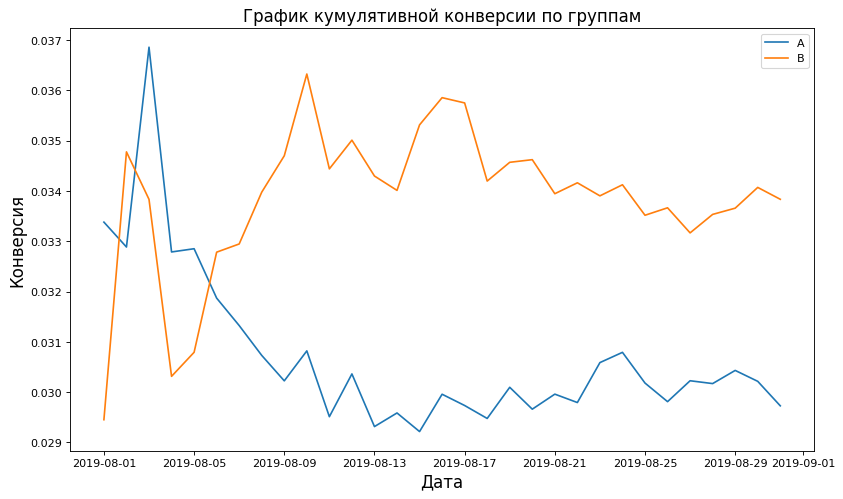

In [84]:
plt.figure(num=None, figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xlabel('Дата', size='15')
plt.ylabel('Конверсия', size='15')
plt.title('График кумулятивной конверсии по группам', size='15')
plt.show()



* После примерного равенства в начале теста, группа B стабильно показывает более высокую конверсию

### График относительного изменения кумулятивной конверсии группы B к группе A. Выводы и предположения.<a id="step2.5"></a>


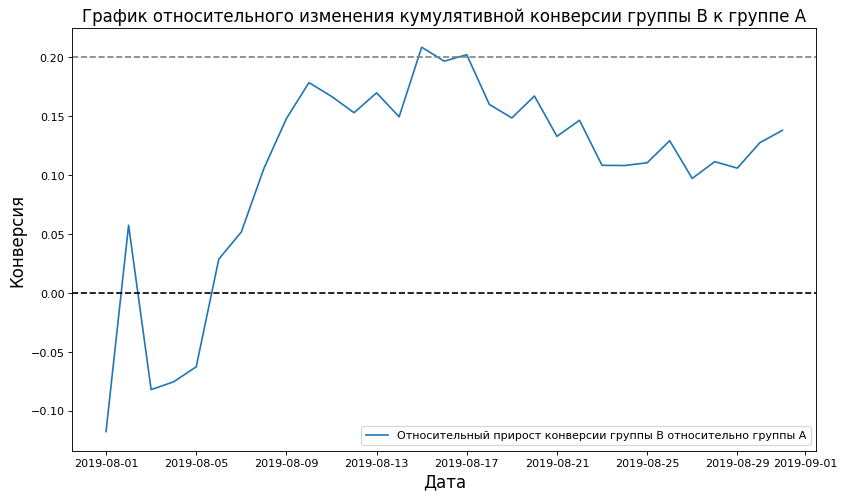

In [85]:
plt.figure(num=None, figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A', size='15')
plt.xlabel('Дата', size='15')
plt.ylabel('Конверсия', size='15')
plt.show()


* График относительного изменения кумулятивной конверсии группы B к группе A подверждает выводы по прошлому графику, конверсия группы B после колебаний в начале теста неуклонно растет.
### В исследовании данных метрик мы не учли возможные аномальные значения, которые могут искажать результат, исследуем их далее.

## Анализ аномальных значений (выбросы и всплески)

### Точечный график количества заказов по пользователям. Выводы и предположения.<a id="step2.6"></a>


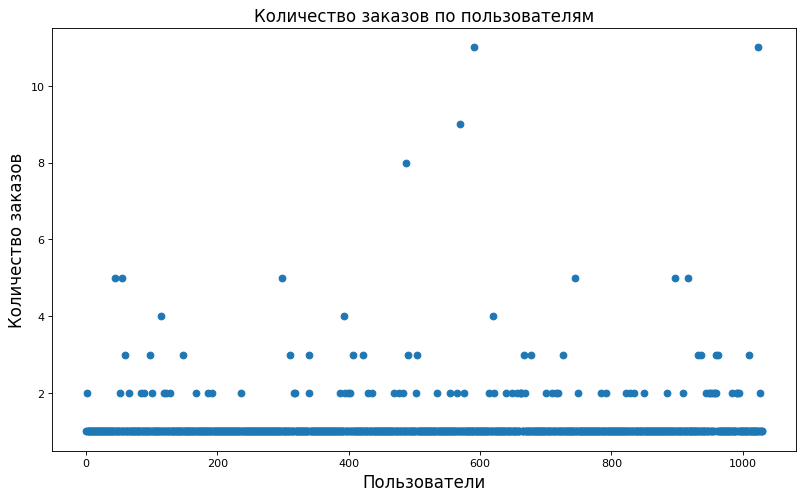

In [86]:
plt.figure(num=None, figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsers.columns = ['userId','orders']

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Количество заказов по пользователям', size='15')
plt.xlabel('Пользователи', size='15')
plt.ylabel('Количество заказов', size='15')
plt.show()

* В основном пользователи не совершают более 2 заказов.

### Подсчёт 95-го и 99-го перцентилей количества заказов на пользователя. Выбор границы для определения аномальных пользователей. <a id="step2.7"></a>


In [87]:
percentiles = np.percentile(ordersByUsers['orders'], [95, 99])
print('Перцентили:\n95%: {}\n99%: {}'.format(percentiles[0],percentiles[1]))

Перцентили:
95%: 2.0
99%: 4.0


* Результаты графика подтверждаются, 95% пользователей совершают не более 2-х заказов
* Выберем в качестве границы для определения аномальных пользователей - 3 и более заказов. 

### Точечный график стоимостей заказов. Выводы и предположения.<a id="step2.8"></a>


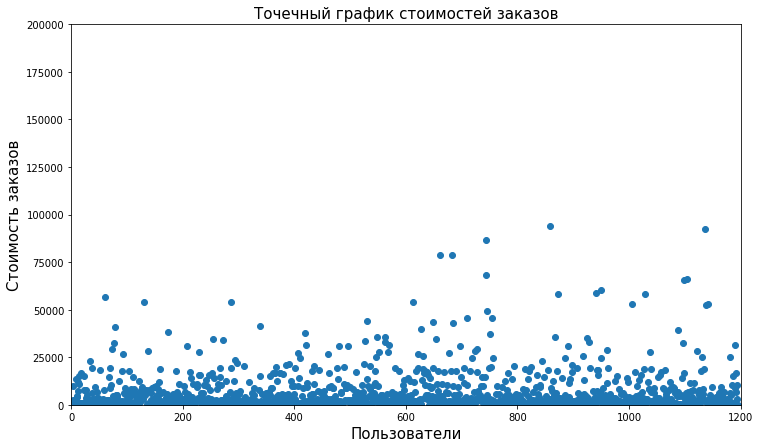

In [88]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(12,7))
plt.axis([0, 1200, 0, 200000])
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов', size='15')
plt.xlabel('Пользователи', size='15')
plt.ylabel('Стоимость заказов', size='15')
plt.show()

* Судя по графику, стоимость большинства заказов немного выше 25 000.

### Подсчёт 95-го и 99-го перцентилей стоимости заказов. Выбор границы для определения аномальных заказов. <a id="step2.9"></a>


In [89]:
percentiles_revenue = np.percentile(orders['revenue'], [95, 99])
print('Перцентили:\n95%: {}\n99%: {}'.format(percentiles_revenue[0],percentiles_revenue[1]))

Перцентили:
95%: 28000.000000000004
99%: 58233.19999999999


* Лишь 5% заказов выше 28 000
* За границу отделения аномальных заказов возьмём 28000

### В ходе исследования основных метрик:
* Замечено увеличение конверсии и среднего чека у группы B по отношению к группе A;
* Выявлены аномальные значения количества заказов и среднего чека;
* Заданы пороги "аномальности" для количества и стоимости заказов на одного пользователя;
* Далее переходим к проверке гипотез


##### [Назад к оглавлению](#step100)

## Формулировка гипотез <a id="step2.10"></a>

**Конверсия:**
* **H0: Конверсия групп А и B НЕ различается;**
* **H1: Конверсия групп А и B различается**

**Средний чек:**
* **H0: Средний чек групп А и B НЕ различается;**
* **H1: Средний чек групп А и B различается.**

### Подготовим данные <a id="step2.11"></a>

In [90]:
#Выделим количество посещений пользователей группы A на каждую дату 
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
#Выделим накопительное количество посещений пользователей группы А с разбивкой по датам
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']


In [91]:
#Выделим количество посещений пользователей группы B на каждую дату
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
#Выделим накопительное количество посещений пользователей группы B с разбивкой по датам
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


In [92]:
#Выделим количество заказов и выручку по пользователям группы А на каждую дату
ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'visitorId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
#Выделим накопительное количество заказов и гакопительную выручку по пользователям группы А с разбивкой по датам
ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

In [93]:
#Выделим количество заказов и выручку по пользователям группы В на каждую дату
ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'visitorId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']
#Выделим накопительное количество заказов и гакопительную выручку по пользователям группы В с разбивкой по датам
ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

In [94]:
#Объеденим всё в один датафрейм
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,20,148579,20,101217,20,148579,20,101217,719,713,719,713
1,2019-08-02,19,93822,23,165531,39,242401,43,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,63,354874,59,380996,507,509,1845,1803
3,2019-08-04,15,70825,16,108571,78,425699,75,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,103,549917,98,581995,756,707,3318,3280


In [95]:
#Выделим пользователей группы А с хотя-бы 1 совершённым заказом и посчитаем кол-во заказов по этим пользователям
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']
#Выделим пользователей группы B с хотя-бы 1 совершённым заказом и посчитаем кол-во заказов по этим пользователям
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

In [96]:
#Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов.
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

##### [Назад к оглавлению](#step100)

## Выбор критерия <a id="step2.12"></a>

### Проверим на нормальность распределение Sample A и Sample B, чтобы определиться с критерием, по которому будем проверять

* Проверим на нормальность распределение **Sample A** критерием Шапиро-Уилка

In [97]:
alpha=.05
results=st.shapiro(sampleA)
p_value=results[1]
print('p-значение:', p_value)

if (p_value<alpha):
    print('Отвергаем нулевую гипотезу: распределение не нормально ')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

p-значение: 0.0
Отвергаем нулевую гипотезу: распределение не нормально 


/opt/conda/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


* Визуально посмотрим распределение

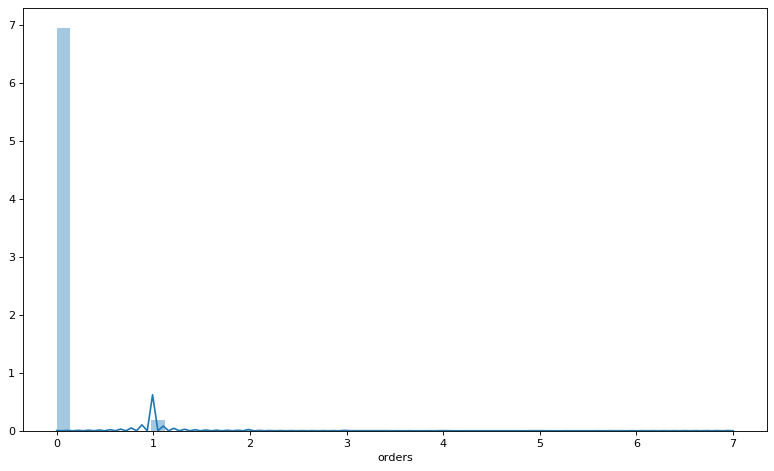

In [98]:
plt.figure(num=None, figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
sns.distplot(sampleA)
plt.show();

* Проверим на нормальность распределение **Sample B** критерием Шапиро-Уилка

In [99]:
alpha=.05
results=st.shapiro(sampleB)
p_value=results[1]
print('p-значение:', p_value)

if (p_value<alpha):
    print('Отвергаем нулевую гипотезу: распределение не нормально ')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

p-значение: 0.0
Отвергаем нулевую гипотезу: распределение не нормально 


* Визуально посмотрим распределение

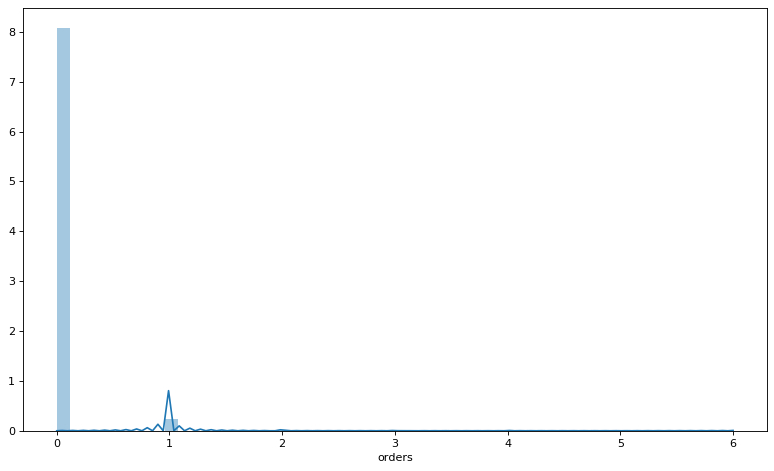

In [100]:
plt.figure(num=None, figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
sns.distplot(sampleB)
plt.show();

#### В обоих случаях мы получили НЕ нормальное распределение (отличное от нормального)

* **Тип данных:** количественный
* **Тип распределения:** отличное от нормального
* **Зависимость групп**: независимые (разные группы пользователей)
* **Количество групп:** 2

#### *В данном случае подойдёт критерий Манна-Уитни, поскольку он отвечает условиям нашего исследования.*


##### [Назад к оглавлению](#step100)

## Расчёт статистической значимости различий между группами

### Расчёт статистической значимости различий в конверсии между группами по «сырым» данным. Выводы и предположения. <a id="step2.13"></a>

In [101]:
print("Относительный прирост конверсии группы B по отношению к группе A: {0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))
alpha = 0.05
results = st.mannwhitneyu(sampleA, sampleB)
print('P-value: {0:.5f}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По "СЫРЫМ" данным в конверсии групп A и B РАЗНИЦА СТАТИСТИЧЕСКИ ЗНАЧИМА!')
else:
    print('По "СЫРЫМ" данным РАЗЛИЧИЙ в конверсии групп A и B НЕТ!')


Относительный прирост конверсии группы B по отношению к группе A: 0.146
P-value: 0.00840
По "СЫРЫМ" данным в конверсии групп A и B РАЗНИЦА СТАТИСТИЧЕСКИ ЗНАЧИМА!


####  По неочищенным данным мы получили статистически значимую разницу
* P-value меньше 0.05, поэтому нулевую гипотезу о равенстве конверсии между группами на данном этапе мы отвергаем
* Относительный прирост конверсии между группами составил - 14,6%!
* Нужно посмотреть на данные после очистки и сравнить выводы

### Расчёт статистической значимости различий в среднем чеке заказа между группами по «сырым» данным. Выводы и предположения.<a id="step2.14"></a>

In [102]:
print("{0:.3f}".format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.365
0.259


In [103]:
print('Относительное изменение среднего чека в группе B по отношению группы A: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))
results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
print('P-value: {0:.5f}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По "ОЧИЩЕННЫМ" данным РАЗНИЦА в средних чеках в группах A и B СТАТИСТИЧЕСКИ ЗНАЧИМА!')
else:
    print('По "ОЧИЩЕННЫМ" данным РАЗЛИЧИЙ в средних чеках в группах A и B НЕТ!')

Относительное изменение среднего чека в группе B по отношению группы A: 0.259
P-value: 0.36465
По "ОЧИЩЕННЫМ" данным РАЗЛИЧИЙ в средних чеках в группах A и B НЕТ!


* P-value больше 0.05, поэтому нулевую гипотезу о равенстве средних чеков между группами на данном этапе мы отвергнуть не можем
* Относительное изменение среднего чека между группами составило почти 26%!
* Нужно посмотреть на данные после очистки и  сравнить выводы

### Расчёт статистической значимости различий в конверсии между группами по «очищенным» данным. Выводы и предположения.<a id="step2.15"></a>

In [104]:
#Ранее мы обозначили границы НЕнормальности - более 2-х заказов и сумма свыше 28000
#Выделим пользователей с количеством заказов более 2-х
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis = 0)
#Выделим пользователей с суммой по заказу более 28000
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
#Объеденим и посчитаем количество "аномальных" пользователей
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print('Аномальных пользователей:{0:.0f}'.format(abnormalUsers.count()))

Аномальных пользователей:74


In [105]:
#Сделаем выборки уже на очищенных данных
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

In [106]:
print('\nОтносительный прирост конверсии группы B по отношению к группе A после очистки данных: {:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))
results = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)
print('P-value: {0:.5f}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По "ОЧИЩЕННЫМ" данным в конверсии групп A и B РАЗНИЦА СТАТИСТИЧЕСКИ ЗНАЧИМА!')
else:
    print('По "ОЧИЩЕННЫМ" данным РАЗЛИЧИЙ в конверсии групп A и B НЕТ!')


Относительный прирост конверсии группы B по отношению к группе A после очистки данных: 0.173
P-value: 0.00652
По "ОЧИЩЕННЫМ" данным в конверсии групп A и B РАЗНИЦА СТАТИСТИЧЕСКИ ЗНАЧИМА!


####  По очищенным данным мы получили статистически значимую разницу
* P-value изменился (0.00652 против 0.00840), но всё также меньше 0.05, поэтому нулевую гипотезу о равенстве конверсии между группами уже по очищенным данным мы отвергаем.
* Относительный прирост конверсии между группами по очищенным данным увеличился, 17,3% против 14,6%!
* Тест по очищенным данным подтверждает большую конверсию группы B

### Расчёт статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным. Выводы и предположения.<a id="step2.16"></a>


In [107]:
print('Относительное изменение среднего чека в группе B по отношению группы A после очистки данных: {:.3f}'.format(
orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()\
/orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()-1))
       
       
results = st.mannwhitneyu(orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
                             orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])
print('P-value: {0:.5f}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По "ОЧИЩЕННЫМ" данным РАЗНИЦА в средних чеках в группах A и B СТАТИСТИЧЕСКИ ЗНАЧИМА!')
else:
    print('По "ОЧИЩЕННЫМ" данным РАЗЛИЧИЙ в средних чеках в группах A и B НЕТ!')

Относительное изменение среднего чека в группе B по отношению группы A после очистки данных: -0.020
P-value: 0.36924
По "ОЧИЩЕННЫМ" данным РАЗЛИЧИЙ в средних чеках в группах A и B НЕТ!


####  По очищенным данным мы НЕ получили статистически значимой разницы
* P-value больше 0.05 (0.369 против 0.365)
* Относительное изменение среднего чека между группами по очищенным составило почти 2% против 26% по сырым данным!
* Нулевую гипотезу о равенстве средних чеков мы отвергнуть не можем.


##### [Назад к оглавлению](#step100)

### Варианты решений: 
1. **Остановить тест, зафиксировать победу одной из групп.** 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.

## Общие выводы по проекту<a id="step3"></a>

### [Часть 1. Приоритизация гипотез.](#step1)
#### [Примение фреймворка `ICE` для приоритизации гипотез. Сортировка по убыванию приоритета.](#step1.1)
* После применения фреймворка `ICE`, самой приоритетной гипотезой стала **`"Запустить акцию, дающую скидку на товар в день рождения"`**

#### [Примение фреймворка `RICE` для приоритизации гипотез. Сортировка по убыванию приоритета.](#step1.2)
* После применения фреймворка `RICE`, самой приоритетной гипотезой стала **`"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"`**

#### [Изменение приоритизации гипотез при применении `RICE` вместо `ICE`. Причины изменений.](#step1.3)
* В первом случае (`ICE`), для оценки приоритета гипотезы мы использовали только критерии влияния на пользователя, уверенность в изменении и стоимость тестирования гипотезы.
* Во втором варианте (`RICE`) мы добавили к предыдущим оценочным показателям охват аудитории, которую затронут изменения.
* По совокупным оценкам (охват, влияние, уверенность в реализации и стоимость) была выбрана гипотеза №10 **`"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"`**


### [Часть 2. Анализ A/B-теста](#step2)
### Анализ кумулятивных метрик

#### [График кумулятивной выручки по группам.](#step2.1)
* По кумулятивной выручке групп замечен уверенный рост группы B, начиная с `2019-08-13`.
* Поскольку проверка на аномальные значения стоимости заказов не проводилась на данном этапе, данные могут искажать общую картину.

#### [График кумулятивного среднего чека по группам.](#step2.2)
* По кумулятивному среднему чеку групп замечен рост группы B, начиная с `2019-08-17`.
* Поскольку проверка на аномальные значения стоимости заказов не проводилась на данном этапе, данные могут быть не репрезантативными.

#### [График относительного изменения кумулятивного среднего чека группы B к группе A.](#step2.3)
* Наблюдаются сильные колебания в относительном изменении среднего чека. 
* Поскольку проверка на аномальные значения стоимости заказов не проводилась на данном этапе, данные могут искажать общую картину.

#### [График кумулятивной конверсии по группам](#step2.4)
* На первой неделе теста конверсия у групп А и B не показывает сильных различий
* Начиная со второй недели группа B стабильно показывает более высокую конверсию

#### [График относительного изменения кумулятивной конверсии группы B к группе A.](#step2.5)
* График относительного изменения кумулятивной конверсии группы B к группе A подверждает выводы по прошлому графику, конверсия группы B после колебаний в начале теста неуклонно растет.

### Анализ аномальных значений (выбросы и всплески)

#### [Точечный график количества заказов по пользователям.](#step2.6)
* Большая часть пользователей совершает 1 заказ.
* Больше 2-х заказов на одного пользователя встречается достаточно редко

#### [Подсчёт 95-го и 99-го перцентилей количества заказов на пользователя. Выбор границы для определения аномальных пользователей. ](#step2.7)
* Только 1% пользователей совершает 4 заказа и выше.
* Результаты подтверждаются, 95% пользователей совершают не более 2-х заказов.
* В качестве границы для определения аномальных пользователей - выбрано 3 и более заказов. 

#### [Точечный график стоимостей заказов.](#step2.8)
* Стоимость большинства заказов немного выше 25 000.


#### [Подсчёт 95-го и 99-го перцентилей стоимости заказов.](#step2.8)
* Лишь 5% заказов выше 28000
* За границу отделения аномальных заказов возьмём **`28000`**


### Расчёт статистической значимости

#### [Расчёт статистической значимости различий в конверсии между группами по «сырым» данным. ](#step2.9)
* Относительный прирост **конверсии** группы B по отношению к группе A по **CЫРЫМ** данным: **0.146 (14,6%)**;
* P-value: **0.00840**;
* По сырым данным мы обнаружили положительную разницу в конверсии группы B по отношению к группе А.

#### [Расчёт статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.](#step2.10)
* Относительное изменение **среднего чека** в группе B по отношению группы A по **CЫРЫМ** данным: **0.259 (25,9%)**;
* P-value: **0.36465**;
* По сырым данным мы НЕ получили статистически значимой разницы между средними чеками групп.


#### [Расчёт статистической значимости различий в конверсии между группами по «очищенным» данным. ](#step2.11)
* Относительный прирост **конверсии** группы B по отношению к группе A по **ОЧИЩЕННЫМ** данным: **0.173 (17,3%)**;
* P-value: **0.00652**;
* По очищенным данным мы также обнаружили положительную разницу в конверсии группы B по отношению к группе А.

####  [Расчёт статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным](#step2.12)
* По очищенным данным мы НЕ получили статистически значимой разницы;
* Относительное изменение **среднего чека** в группе B по отношению группы A по **ОЧИЩЕННЫМ** данным: **-0.020 (-2%)**;
* P-value: **0.36924**;
* Cтатистически значимых различий средних чеков между группами не выявлено.







## Рекомендации по результатам проведённого А/B теста <a id="step4"></a>

#### В результате анализа проведённого A/B теста гипотезы 
**`"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"`** :
* Разницы в среднем чеке между контрольной группой (Группа А) и тестовой группой (Группа B) не обнаружено.
* Выявлено значительное увеличение конверсии (до 17,3%) у тестовой группы (Группа B) по отношению к контрольной группе (Группа A).
* Существенные различия выявлены, можно **`Остановить тест, зафиксировать победу тестовой группы.`** 
* Рекомендуется масштабировать гипотезу на всех пользователей, с 95% вероятностью это обеспечит прирост конверсии.




##### [Назад к оглавлению](#step100)